1. Load Advertising.csv dataset using pandas

In [2332]:
import pandas as pd
import sklearn
import numpy as np

df = pd.read_csv("Advertising.csv", index_col=0)
y = df["Sales"]
x = df.drop("Sales", axis=1)
print(x[:5])
print(y[:5])

      TV  Radio  Newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4
1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64


2. Standardize each column of the dataset
For each predictor x_j, for j = 0, 1, ⋯ , j, compute for the standardized values:


In [2333]:
x_scaled = (x-np.mean(x, axis=0))/np.std(x, axis=0)
print("Scaled X:\n", x_scaled[:5])

x_sk = sklearn.preprocessing.scale(df, axis=0)
print("\nScaled X using sklearn:\n", x_sk[:5])

y_scaled = (y-np.mean(y, axis=0))/np.std(y, axis=0)
print("\nScaled Y:\n", y[:5])

Scaled X:
          TV     Radio  Newspaper
1  0.969852  0.981522   1.778945
2 -1.197376  1.082808   0.669579
3 -1.516155  1.528463   1.783549
4  0.052050  1.217855   1.286405
5  0.394182 -0.841614   1.281802

Scaled X using sklearn:
 [[ 0.96985227  0.98152247  1.77894547  1.55205313]
 [-1.19737623  1.08280781  0.66957876 -0.69604611]
 [-1.51615499  1.52846331  1.78354865 -0.90740587]
 [ 0.05204968  1.21785493  1.28640506  0.86033029]
 [ 0.3941822  -0.84161366  1.28180188 -0.21568303]]

Scaled Y:
 1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64


3. So you must add an extra column composing of all ones to X.

In [2334]:
x_scaled.insert(0, 'Bias',[1]*len(x))

x_scaled[:5]

,Bias,TV,Radio,Newspaper
1,1,0.969852,0.981522,1.778945
2,1,-1.197376,1.082808,0.669579
3,1,-1.516155,1.528463,1.783549
4,1,0.052050,1.217855,1.286405
5,1,0.394182,-0.841614,1.281802


4. Divide the dataset into training and testing, with 0.85 and 0.15 ratio, respectively

In [2335]:
import sklearn.model_selection

test_size=0.15
seed=42
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_scaled, y_scaled, test_size=test_size, random_state=seed)
y_train[:5]


10    -0.657617
19    -0.523115
56     1.859486
76    -1.022693
151    0.399182
Name: Sales, dtype: float64

5. Fit the model on the training set. Essentially, you have to optimize the model using the
training set, and not including the test set. (Instruction 5 elaborated below)


5. 1. initialize_weights: returns a vector init_w composing of 4 uniformly
distributed numbers between 0 and 1. This serves as the initial weights θ_j, for j =
0, 1, 2, 3. You can set a random seed so you can objectively assess if your model is
working correctly. Seed function is used to save the state of a random function, so that it
can generate same random numbers on multiple executions of the code. 

In [2336]:
def initialize_weights(use_random=True, seed=42):
    """
    Initializes weights for a linear regression model.
    
    Parameters:
    - use_random (bool): If True, weights are initialized to random values between 0 and 1. 
                         If False, weights are initialized to 0.
    - seed (int): Random seed for reproducibility (only used if use_random is True).
    
    Returns:
    - init_w (np.array): A vector of 4 weights.
    """
    if use_random:
        np.random.seed(seed)  # Set the random seed for reproducibility
        init_w = np.random.uniform(0, 1, 4)  # 4 random numbers between 0 and 1
    else:
        init_w = np.array([0.0, 0.0, 0.0, 0.0])  # Initialize all weights to zero
    
    return init_w

5. 2. predict: returns a vector of the predicted values y_hat_sub_i 

In [2337]:
def predict(X, weights):
    """
    Predicts the target values (y_hat) using the input features and weights.
    
    Parameters:
    - X (np.array): The feature matrix (with a column of ones for the bias term).
    - weights (np.array): The vector of weights, including the bias term.
    
    Returns:
    - y_hat (np.array): The predicted values.
    """
    # Calculate the predicted values using matrix multiplication
    y_hat = X.dot(weights)
    
    return y_hat

5. 3. compute_cost: returns a scalar value that tells us how accurate the model is

In [2338]:
def compute_cost(X, y, weights):
    """
    Computes the cost function (Mean Squared Error) for the given data and weights.
    
    Parameters:
    - X (np.array): The feature matrix (with a column of ones for the bias term).
    - y (np.array): The actual target values.
    - weights (np.array): The vector of weights, including the bias term.
    
    Returns:
    - cost (float): The cost value (scalar), representing the model's error.
    """
    m = len(y)  # Number of training examples
    y_hat = X.dot(weights)  # Predicted values
    
    # Compute the squared differences
    squared_errors = (y_hat - y) ** 2
    
    # Compute the cost (Mean Squared Error)
    cost = (1 / (2 * m)) * np.sum(squared_errors)
    
    return cost

5. 4. compute_gradient: returns a matrix w that represents the partial derivative of the cost function with respect to with respect to each parameter

In [2339]:
def compute_gradient(X, y, weights):
    """
    Computes the gradient of the cost function with respect to the weights.
    
    Parameters:
    - X (np.array): The feature matrix (with a column of ones for the bias term).
    - y (np.array): The actual target values.
    - weights (np.array): The vector of weights, including the bias term.
    
    Returns:
    - gradient (np.array): The gradient matrix (4x1), representing the partial derivatives.
    """
    m = len(y)  # Number of training examples
    y_hat = X.dot(weights)  # Predicted values
    
    # Compute the error (difference between predicted and actual values)
    error = y_hat - y
    
    # Compute the gradient for each parameter
    gradient = (1 / m) * X.T.dot(error)
    
    return gradient

5. 5. update_weights: returns a 4x1 matrix that contains the updated weights. 

In [2340]:
def update_weights(weights, gradient, learning_rate=0.01):
    """
    Updates the weights using the gradient and learning rate.
    
    Parameters:
    - weights (np.array): The current weights (4x1 vector, including the bias term).
    - gradient (np.array): The gradient of the cost function with respect to the weights (4x1 vector).
    - learning_rate (float): The learning rate (alpha) for gradient descent.
    
    Returns:
    - updated_weights (np.array): The updated weights after one iteration of gradient descent (4x1 vector).
    """
    # Update the weights by subtracting the learning rate times the gradient
    updated_weights = weights - learning_rate * gradient
    
    return updated_weights

5. 6. grad_descent: returns 2 matrices: one matrix for the weights, and one matrix for the
cost values per iteration. grad_descent calls the functions 1-5 until the number of
iterations is reached.

In [2341]:
def grad_descent(X, y, learning_rate=0.01, iterations=100):
    """
    Performs gradient descent to learn the weights, calling the necessary helper functions.
    
    Parameters:
    - X (np.array): The feature matrix (with a column of ones for the bias term).
    - y (np.array): The actual target values.
    - learning_rate (float): The learning rate (alpha) for gradient descent.
    - iterations (int): The number of iterations to run gradient descent.
    
    Returns:
    - weights_history (np.array): A matrix containing the weights at each iteration.
    - cost_history (np.array): A matrix containing the cost at each iteration.
    """
    m, n = X.shape  # Number of training examples (m) and number of features (n)
    
    # Initialize weights and histories
    weights = initialize_weights(seed=42)  # Calling the initialize_weights function
    weights_history = np.zeros((iterations, n))
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        # Make predictions (y_hat) using the current weights
        y_hat = predict(X, weights)  # Call the predict function
        
        # Compute the gradient
        gradient = compute_gradient(X, y, weights)  # Call the compute_gradient function
        
        # Update the weights
        weights = update_weights(weights, gradient, learning_rate)  # Call the update_weights function
        
        # Compute the cost using the updated weights
        cost = compute_cost(X, y, weights)  # Call the compute_cost function
        
        # Store the weights and cost for this iteration
        weights_history[i, :] = weights
        cost_history[i] = cost
    
    return weights_history, cost_history

5. 7. plot_costs: plot the costs as a function of iteration

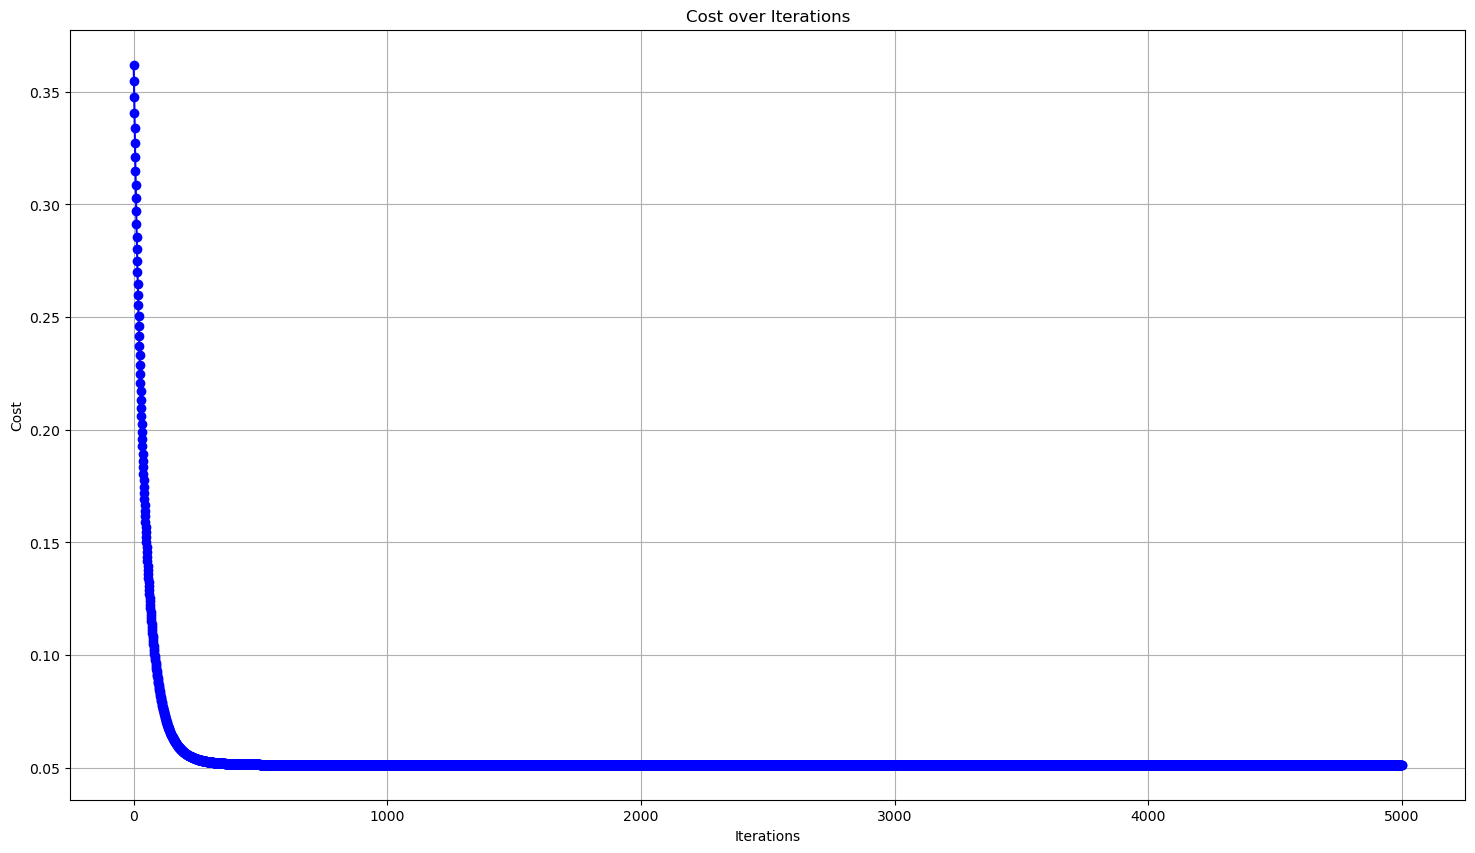

Finalists for the weights


array([[4.36682560e-04, 7.37383146e-01, 5.36307180e-01, 3.14254020e-03],
       [4.36682560e-04, 7.37383146e-01, 5.36307180e-01, 3.14254020e-03],
       [4.36682560e-04, 7.37383146e-01, 5.36307180e-01, 3.14254020e-03],
       [4.36682560e-04, 7.37383146e-01, 5.36307180e-01, 3.14254020e-03],
       [4.36682560e-04, 7.37383146e-01, 5.36307180e-01, 3.14254020e-03]])

In [2342]:
import matplotlib.pyplot as plt

def plot_costs(cost_history):
    """
    Plots the costs as a function of iteration.
    
    Parameters:
    - cost_history (np.array): The array containing the cost at each iteration.
    """
    plt.figure(figsize=(18, 10))
    plt.plot(range(len(cost_history)), cost_history, color='blue', marker='o', linestyle='-')
    plt.title('Cost over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.grid(True)
    plt.show()


learning_rate = 0.01
iterations = 5000
weights_history, cost_history = grad_descent(x_train, y_train, learning_rate, iterations)

# Plot the costs
plot_costs(cost_history)
print("Finalists for the weights")
weights_history[-5:]


In [2343]:
final_weights = weights_history[iterations-1]
print("Final weights:", final_weights)

Final weights: [4.36682560e-04 7.37383146e-01 5.36307180e-01 3.14254020e-03]


5. 8. Predict y for train set and calculate the cost.

In [2344]:
y_train_hat = predict(x_train, final_weights)
print("Predicted y of train set:\n", y_train_hat[:5])

y_train_cost = compute_cost(x_train, y_train, final_weights)
print("\nCost of train set:\n", y_train_cost)

Predicted y of train set:
 10    -0.294970
19    -0.771680
56     1.397679
76    -0.371565
151    0.813103
dtype: float64

Cost of train set:
 0.05133623590933358


5. 6. Predict y for test set and calculate the cost

In [2345]:
y_test_hat = predict(x_test, final_weights)
print("Predicted y of test set:\n", y_test_hat[:5])

y_test_cost = compute_cost(x_test, y_test, final_weights)
print("\nCost of test set:\n", y_test_cost)

Predicted y of test set:
 96     0.445526
16     1.304953
31     1.440518
159   -0.668983
129    1.559238
dtype: float64

Cost of test set:
 0.05268626215593916


8. Since the data is standardized, you might be surprised that the predictions differ
from the original data. In order to revert back a standardized data into the original form,
we simply have to equate the previous equation:

In [2346]:
x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0)

scaled_bias = final_weights[0]
scaled_weights = final_weights[1:]

# Adjust the bias/weights for the original scale
bias_orig = scaled_bias - np.sum(scaled_weights * x_mean / x_std)
weights_orig = scaled_weights / x_std

adjusted_weights = np.concatenate([[bias_orig], weights_orig])

# Rescale the weights back to the original scale
print("Weights adjusted for original scale:\n", adjusted_weights)


y_mean = np.mean(y, axis=0)
y_std = np.std(y, axis=0)


x_orig = x
x_orig.insert(0, 'Bias',[1]*len(x))

y_scaled_hat = predict(x_orig, adjusted_weights)
print("\nPredicted y of orig set with adjusted weights:\n", y_scaled_hat[:5])

# Reverse the standardization of y
y_orig_hat = y_scaled_hat * y_std + y_mean


print("\nReversed standardization predicted values:\n", y_orig_hat[:5])

Weights adjusted for original scale:
 [-2.11253587e+00  8.61033279e-03  3.62133702e-02  1.44656825e-04]

Predicted y of orig set with adjusted weights:
 1    1.247577
2   -0.299667
3   -0.292220
4    0.696004
5   -0.156235
dtype: float64

Reversed standardization predicted values:
 1    20.515387
2    12.462916
3    12.501673
4    17.644782
5    13.209389
dtype: float64


9. Observe the cost results and analyse. 

In [2347]:
m = len(y)  # Number of samples
cost = (1 / m) * np.sum((y - y_orig_hat) ** 2)
print("Cost of original unscaled predicted values:\n", cost)

Cost of original unscaled predicted values:
 2.7919302013509144


# Questions

1. What are the optimal weights found by your implemented gradient descent? Plug it into
the linear model:
$$ h_{\theta}(x) = \theta_{0} + \theta_{1}TV + \theta_{2}Radio + \theta_{3}Newspaper$$


In [2348]:
print(f"h_0(x)={bias_orig} + {adjusted_weights[1]} * TV + {adjusted_weights[2]} * Radio + {adjusted_weights[3]} * Newspaper")

h_0(x)=-2.112535865333081 + 0.008610332790565228 * TV + 0.036213370182075835 * Radio + 0.0001446568246602006 * Newspaper


- The sales value is equal to the intercept 3.028... when other variables are held down to 0(tv=0, radio=0, newspaper=0)

2. 

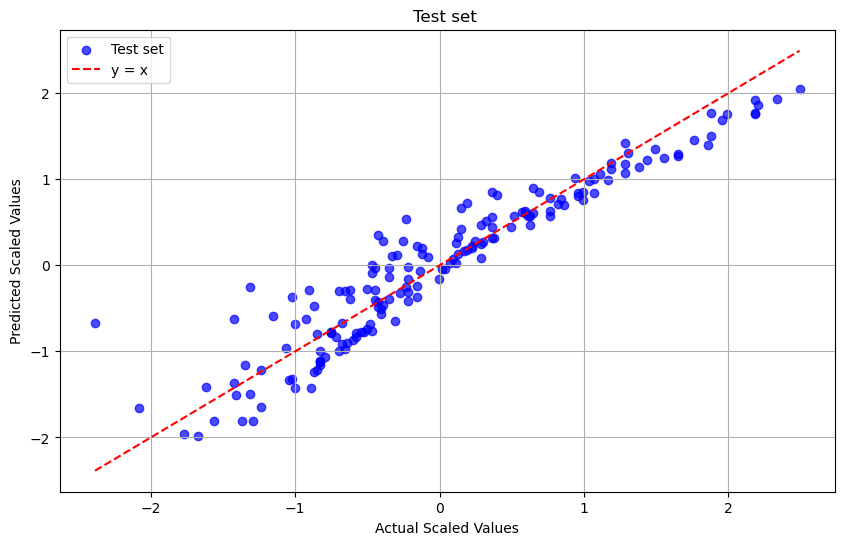

In [2349]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_hat, color='blue', label='Test set', alpha=0.7)

# Adding a line for reference (y = x)
plt.plot([y_train.min(), y_train.max()], 
            [y_train.min(), y_train.max()], 
            color='red', linestyle='--', label='y = x')

plt.title('Test set ')
plt.xlabel('Actual Scaled Values')
plt.ylabel('Predicted Scaled Values')
plt.grid(True)
plt.legend()
plt.show()


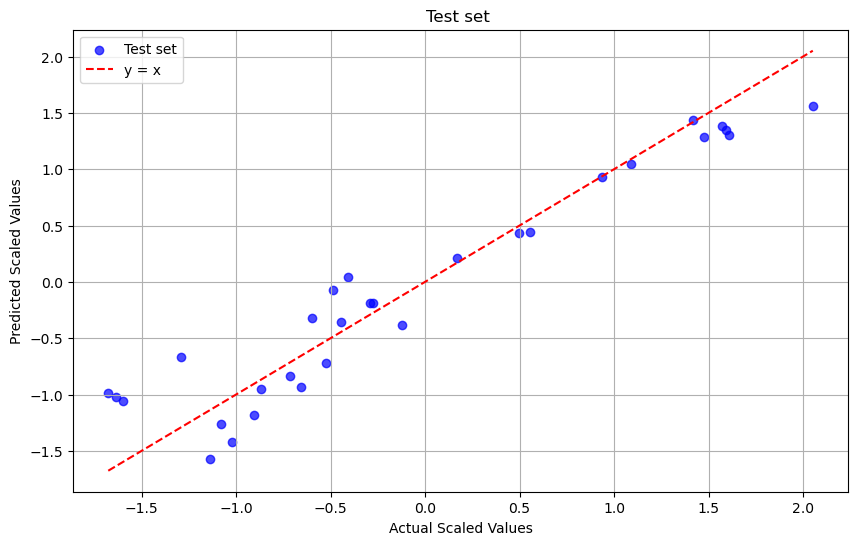

In [2350]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_hat, color='blue', label='Test set', alpha=0.7)

# Adding a line for reference (y = x)
plt.plot([y_test.min(), y_test.max()], 
            [y_test.min(), y_test.max()], 
            color='red', linestyle='--', label='y = x')

plt.title('Test set ')
plt.xlabel('Actual Scaled Values')
plt.ylabel('Predicted Scaled Values')
plt.grid(True)
plt.legend()
plt.show()

In [2351]:
import sklearn.metrics as sk_metrics


print("R2 Score for train:", sk_metrics.r2_score(y_train,y_train_hat))
print("R2 Score for train:", sk_metrics.r2_score(y_test,y_test_hat))

R2 Score for train: 0.8936793584593189
R2 Score for train: 0.9110275702091694


3. What happens to the error, r2, and cost as the number of iterations increase? Show your
data and proof. You can alternatively plot your result data for visualization and check
until 50000 iterations or more (actually).

In [2352]:

iteration_list = [100, 500, 1000, 2000, 5000, 10000, 25000, 50000]

for n_iter in iteration_list:
    weights, cost_history = grad_descent(x_train, y_train, learning_rate, n_iter)
    y_train_hat = predict(x_train, weights[-1])
    y_test_hat = predict(x_test, weights[-1])

    # Get the final cost (last value in cost_history)
    final_cost = cost_history[-1]
    
    # Print the cost and R² scores for the current iteration count
    print(f"Iterations: {n_iter}")
    print(f"Final Cost: {final_cost}")
    print(f"R^2 Score for {n_iter} iterations (Train): {sk_metrics.r2_score(y_train, y_train_hat)}")
    print(f"R^2 Score for {n_iter} iterations (Test): {sk_metrics.r2_score(y_test, y_test_hat)}\n")


Iterations: 100
Final Cost: 0.08600217101672748
R^2 Score for 100 iterations (Train): 0.8218839804979278
R^2 Score for 100 iterations (Test): 0.8098004538502264

Iterations: 500
Final Cost: 0.05143211521859518
R^2 Score for 500 iterations (Train): 0.8934807862521712
R^2 Score for 500 iterations (Test): 0.9101235942076645

Iterations: 1000
Final Cost: 0.05133650395407905
R^2 Score for 1000 iterations (Train): 0.8936788033214363
R^2 Score for 1000 iterations (Test): 0.9109912615411897

Iterations: 2000
Final Cost: 0.05133623591159402
R^2 Score for 2000 iterations (Train): 0.8936793584546373
R^2 Score for 2000 iterations (Test): 0.9110274671841093

Iterations: 5000
Final Cost: 0.05133623590933358
R^2 Score for 5000 iterations (Train): 0.8936793584593189
R^2 Score for 5000 iterations (Test): 0.9110275702091694

Iterations: 10000
Final Cost: 0.0513362359093336
R^2 Score for 10000 iterations (Train): 0.8936793584593188
R^2 Score for 10000 iterations (Test): 0.9110275702091721

Iterations: 25

- As the iterations increased, the cost rapidly decreased but the difference is plateuing starting from iteration 500. As for the R2 score, it is increasing but the increase is plateuing just like a logarithmic function, starting from 500.

4. Once you determine the optimal number of iterations, check the effect on the cost and
error as you change the learning rate. The common learning rates in machine learning
include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visualize
the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE
PLOT. Provide your analysis.

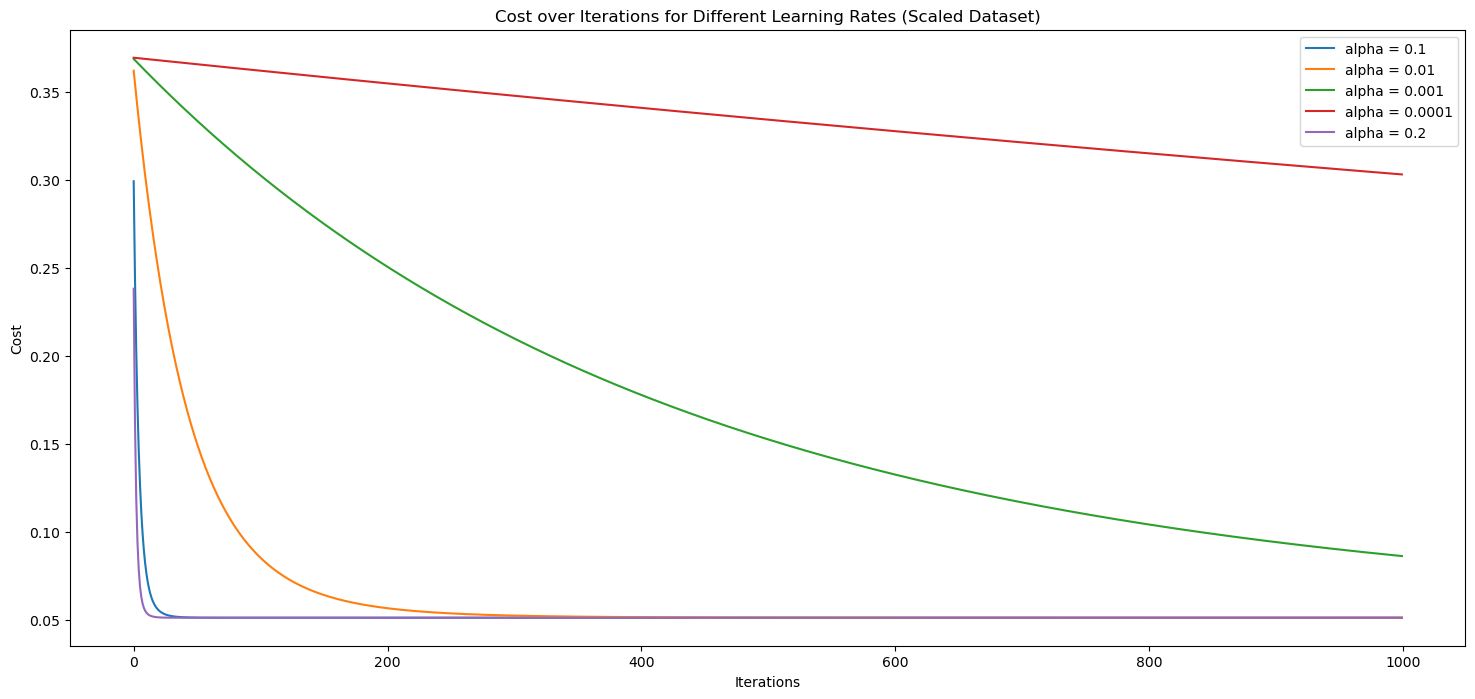

In [2353]:
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.2]
iterations = 1000

plt.figure(figsize=(18, 8))
for alpha in learning_rates:
    weights, cost_history = grad_descent(x_train, y_train, alpha, iterations)
    plt.plot(cost_history, label=f"alpha = {alpha}")

plt.title("Cost over Iterations for Different Learning Rates (Scaled Dataset)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

- Higher learning rates converge rapidly(0.1 and 0.2) while lower learning rates tend to take longer to start converging(0.01 and lower). Learning rates 0.001 and lower won't even show sign of convergence even after the 1000th iteration, taking too long and can waste computing resources.

5. Is there a relationship on the learning rate and the number of iterations?

- Higher learning rates are faster to reach convergence, needing lower iterations. While lower learning rates takes the slow approach, reaching convergence at longer and higher iterations

6. Compare the results with the results of ordinary least squares function

In [2354]:
# Fit the model using OLS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


ols_model = LinearRegression()
ols_model.fit(x_train.iloc[:, 1:], y_train)  # Removing the bias column
y_train_pred_ols = ols_model.predict(x_train.iloc[:, 1:])
y_test_pred_ols = ols_model.predict(x_test.iloc[:, 1:])

# R2 scores
r2_train = sk_metrics.r2_score(y_train, y_train_hat)
r2_test = sk_metrics.r2_score(y_test, y_test_hat)

# Costs
train_cost = compute_cost(x_train, y_train, adjusted_weights)
test_cost = compute_cost(x_test, y_test, adjusted_weights)


# Compute R2 score for OLS
r2_train_ols = sk_metrics.r2_score(y_train, y_train_pred_ols)
r2_test_ols = sk_metrics.r2_score(y_test, y_test_pred_ols)

# Compute MSE for OLS
mse_train_ols = mean_squared_error(y_train, y_train_pred_ols)
mse_test_ols = mean_squared_error(y_test, y_test_pred_ols)

# Linear regression data
print("----------------------------------------------------------------------")
print(f"OLS R^2 score for training set: {r2_train_ols}")
print(f"OLS R^2 score for test set: {r2_test_ols}")
print(f"OLS MSE for training set: {mse_train_ols}")
print(f"OLS MSE for test set: {mse_test_ols}")

print(f"OLS Coefficients: {ols_model.intercept_}, {ols_model.coef_}")

# Compare 

print("----------------------------------------------------------------------")
print(f"Gradient Descent R^2 score for training set: {r2_train}")
print(f"Gradient Descent R^2 score for test set: {r2_test}")
print(f"Gradient Descent MSE for training set: {train_cost}")
print(f"Gradient Descent MSE for test set: {test_cost}")
print(f"Gradient Descent Coefficients: {final_weights[0]}, {final_weights[1:]}")

----------------------------------------------------------------------
OLS R^2 score for training set: 0.8936793584593188
OLS R^2 score for test set: 0.9110275702091712
OLS MSE for training set: 0.10267247181866718
OLS MSE for test set: 0.10537252431187616
OLS Coefficients: 0.00043668256008587425, [0.73738315 0.53630718 0.00314254]
----------------------------------------------------------------------
Gradient Descent R^2 score for training set: 0.8936793584593188
Gradient Descent R^2 score for test set: 0.9110275702091721
Gradient Descent MSE for training set: 2.7228715674097526
Gradient Descent MSE for test set: 2.600264391197922
Gradient Descent Coefficients: 0.0004366825600865185, [0.73738315 0.53630718 0.00314254]


- They are very much identical, everything actually